# MSCA 32003: Assignment 4

## Wilson McDermott, Samantha Patil, and Oluwafemi Fabiyi

### March 11, 2021 

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

#### Sources: 

http://homepage.divms.uiowa.edu/~chayang/web/papers/emnlp_brand_preference.pdf

https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a

#### Loading / Understanding Data:

In [ ]:
metadata = pd.read_excel('Brand_stratategy_data.v3.xls',sheet_name='data Dictionary')
datatoclean = pd.read_excel('Brand_stratategy_data.v3.xls',sheet_name='data')

In [ ]:
metadata

,Variable,Unnamed: 1
0,NaN,-99 is missing brand information for person
1,respid,respondent id
2,hq_cell,"Revenue groups: 1- LT 100k, 2 - 100 - 250 K, 3..."
3,brandid,brands
4,NaN,1. Advanta
5,NaN,2. Amex
6,NaN,3. Bank of America
7,NaN,4. Chase
8,NaN,5. Citibank
9,NaN,6. HSBC


In [ ]:
datatoclean

,respid,hq_cell,brandid,origbrand,pri_sec,q6,consider,att_rating1,att_rating2,att_rating3,...,att_rating22,att_rating23,att_rating24,att_rating25,att_rating26,att_rating27,att_rating28,att_rating29,att_rating30,att_rating31
0,1,3,1,1,-99,6,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,1,3,2,2,0,6,9,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,1,3,3,3,0,6,11,3,3,2,...,3,2,3,3,3,3,3,3,3,3
3,1,3,4,4,0,6,11,3,2,2,...,3,2,3,3,2,2,3,2,3,3
4,1,3,5,5,-99,6,11,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,915,2,5,5,0,3,6,3,3,3,...,3,3,3,2,3,4,3,4,4,4
5945,915,2,6,6,-99,3,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
5946,915,2,7,7,0,3,8,3,3,3,...,2,3,3,2,3,4,3,4,4,4
5947,915,2,8,25,1,3,11,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
datatoclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   respid        5949 non-null   int64
 1   hq_cell       5949 non-null   int64
 2   brandid       5949 non-null   int64
 3   origbrand     5949 non-null   int64
 4   pri_sec       5949 non-null   int64
 5   q6            5949 non-null   int64
 6   consider      5949 non-null   int64
 7   att_rating1   5949 non-null   int64
 8   att_rating2   5949 non-null   int64
 9   att_rating3   5949 non-null   int64
 10  att_rating4   5949 non-null   int64
 11  att_rating5   5949 non-null   int64
 12  att_rating6   5949 non-null   int64
 13  att_rating7   5949 non-null   int64
 14  att_rating8   5949 non-null   int64
 15  att_rating9   5949 non-null   int64
 16  att_rating10  5949 non-null   int64
 17  att_rating11  5949 non-null   int64
 18  att_rating12  5949 non-null   int64
 19  att_rating13  5949 non-null

In [ ]:
datatoclean = datatoclean.replace(-99, np.nan)

In [ ]:
datatoclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   respid        5949 non-null   int64  
 1   hq_cell       5949 non-null   int64  
 2   brandid       5949 non-null   int64  
 3   origbrand     5248 non-null   float64
 4   pri_sec       3382 non-null   float64
 5   q6            5949 non-null   int64  
 6   consider      4305 non-null   float64
 7   att_rating1   3382 non-null   float64
 8   att_rating2   3382 non-null   float64
 9   att_rating3   3382 non-null   float64
 10  att_rating4   3382 non-null   float64
 11  att_rating5   3382 non-null   float64
 12  att_rating6   3382 non-null   float64
 13  att_rating7   3382 non-null   float64
 14  att_rating8   3382 non-null   float64
 15  att_rating9   3382 non-null   float64
 16  att_rating10  3382 non-null   float64
 17  att_rating11  3382 non-null   float64
 18  att_rating12  3382 non-null 

From our understanding, the goal is to understand and predict the likelihood of a customer to use / continue to use each brand's products (as measured by "consider"). As such, I re-orient the data to better predict this.

In [ ]:
datacleanup = datatoclean.copy()

In [ ]:
datacleanup["hq_cell"].describe()

count    5949.000000
mean        2.133132
std         0.854255
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: hq_cell, dtype: float64

In [ ]:
datacleanup["origbrand"].describe()

count    5248.000000
mean        6.051639
std         6.295606
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        29.000000
Name: origbrand, dtype: float64

In [ ]:
todrop = ["respid","origbrand"]

datacleanup = datacleanup.drop(todrop, axis=1)

In [ ]:
datacleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hq_cell       5949 non-null   int64  
 1   brandid       5949 non-null   int64  
 2   pri_sec       3382 non-null   float64
 3   q6            5949 non-null   int64  
 4   consider      4305 non-null   float64
 5   att_rating1   3382 non-null   float64
 6   att_rating2   3382 non-null   float64
 7   att_rating3   3382 non-null   float64
 8   att_rating4   3382 non-null   float64
 9   att_rating5   3382 non-null   float64
 10  att_rating6   3382 non-null   float64
 11  att_rating7   3382 non-null   float64
 12  att_rating8   3382 non-null   float64
 13  att_rating9   3382 non-null   float64
 14  att_rating10  3382 non-null   float64
 15  att_rating11  3382 non-null   float64
 16  att_rating12  3382 non-null   float64
 17  att_rating13  3382 non-null   float64
 18  att_rating14  3382 non-null 

In [ ]:
metadata

,Variable,Unnamed: 1
0,NaN,-99 is missing brand information for person
1,respid,respondent id
2,hq_cell,"Revenue groups: 1- LT 100k, 2 - 100 - 250 K, 3..."
3,brandid,brands
4,NaN,1. Advanta
5,NaN,2. Amex
6,NaN,3. Bank of America
7,NaN,4. Chase
8,NaN,5. Citibank
9,NaN,6. HSBC


In [ ]:
Cols = ["Revenue Group","Brand_id","Pvs.S","Competitive Preference","Consider","Easy Access","Multi-Channels","Fin_Products","Cash Flow","Cool","Leader","Innovative","Personalized","Trustworthy","Responsive","Advisor","Understands Needs","Problem Solver","Best Interest","Prestigious","Feel Valued","Personal","Rewards","Rewards Program","Easy App","Cust Service","Financing","Clear Comm","Security","Easier Life","Easy To Invest","Quick App","Fees","best Rates","Fair","Value"]
len(Cols)

36

In [ ]:
datacleanup.columns = Cols
datacleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Revenue Group           5949 non-null   int64  
 1   Brand_id                5949 non-null   int64  
 2   Pvs.S                   3382 non-null   float64
 3   Competitive Preference  5949 non-null   int64  
 4   Consider                4305 non-null   float64
 5   Easy Access             3382 non-null   float64
 6   Multi-Channels          3382 non-null   float64
 7   Fin_Products            3382 non-null   float64
 8   Cash Flow               3382 non-null   float64
 9   Cool                    3382 non-null   float64
 10  Leader                  3382 non-null   float64
 11  Innovative              3382 non-null   float64
 12  Personalized            3382 non-null   float64
 13  Trustworthy             3382 non-null   float64
 14  Responsive              3382 non-null   

In [ ]:
datacleanup["Pvs.S"].describe()

count    3382.000000
mean        0.586339
std         0.796006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Pvs.S, dtype: float64

In [ ]:
datacleanup = datacleanup.drop(["Pvs.S"], axis=1)

In [ ]:
datacleanup["Consider"].describe()

count    4305.000000
mean        8.009988
std         2.816762
min         1.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        12.000000
Name: Consider, dtype: float64

In [ ]:
#dropping any columns we can't learn from
datacleanup = datacleanup.dropna(subset = ["Consider"])

In [ ]:
datacleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305 entries, 1 to 5948
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Revenue Group           4305 non-null   int64  
 1   Brand_id                4305 non-null   int64  
 2   Competitive Preference  4305 non-null   int64  
 3   Consider                4305 non-null   float64
 4   Easy Access             3327 non-null   float64
 5   Multi-Channels          3327 non-null   float64
 6   Fin_Products            3327 non-null   float64
 7   Cash Flow               3327 non-null   float64
 8   Cool                    3327 non-null   float64
 9   Leader                  3327 non-null   float64
 10  Innovative              3327 non-null   float64
 11  Personalized            3327 non-null   float64
 12  Trustworthy             3327 non-null   float64
 13  Responsive              3327 non-null   float64
 14  Advisor                 3327 non-null   

In [ ]:
datacleanup

,Revenue Group,Brand_id,Competitive Preference,Consider,Easy Access,Multi-Channels,Fin_Products,Cash Flow,Cool,Leader,...,Financing,Clear Comm,Security,Easier Life,Easy To Invest,Quick App,Fees,best Rates,Fair,Value
1,3,2,6,9.0,4.0,4.0,4.0,4.0,2.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,3,6,11.0,3.0,3.0,2.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3,4,6,11.0,3.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
4,3,5,6,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,6,6,11.0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,2,3,3,7.0,3.0,3.0,3.0,2.0,2.0,2.0,...,2.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5944,2,5,3,6.0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5946,2,7,3,8.0,3.0,3.0,3.0,2.0,3.0,2.0,...,2.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5947,2,8,3,11.0,3.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


We can see above that for some rows it looks like th majority of the row is null apart from the first few columns. Becasue these rows will likely not contribute much to the model, and imputing them will skew the data, I will drop rows with null values for at least five attributes.

In [ ]:
datacleanup = datacleanup.dropna(thresh=5)

In [ ]:
datacleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 1 to 5948
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Revenue Group           3327 non-null   int64  
 1   Brand_id                3327 non-null   int64  
 2   Competitive Preference  3327 non-null   int64  
 3   Consider                3327 non-null   float64
 4   Easy Access             3327 non-null   float64
 5   Multi-Channels          3327 non-null   float64
 6   Fin_Products            3327 non-null   float64
 7   Cash Flow               3327 non-null   float64
 8   Cool                    3327 non-null   float64
 9   Leader                  3327 non-null   float64
 10  Innovative              3327 non-null   float64
 11  Personalized            3327 non-null   float64
 12  Trustworthy             3327 non-null   float64
 13  Responsive              3327 non-null   float64
 14  Advisor                 3327 non-null   

In [ ]:
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(1, "Advanta")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(2, "Amex")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(3, "Bank of America")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(4, "Chase")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(5, "Citibank")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(6, "HSBC")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(7, "Wells Fargo")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(8, "Other Primary")
datacleanup['Brand_id'] = datacleanup['Brand_id'].replace(9, "Other Secondary")
datacleanup['Brand_id']

1                  Amex
2       Bank of America
3                 Chase
5                  HSBC
6           Wells Fargo
             ...       
5942    Bank of America
5944           Citibank
5946        Wells Fargo
5947      Other Primary
5948    Other Secondary
Name: Brand_id, Length: 3327, dtype: object

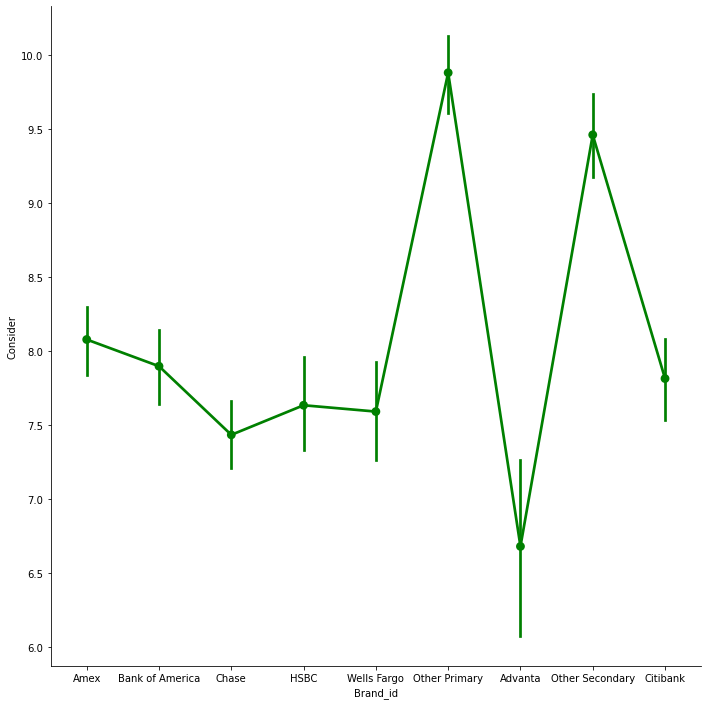

In [ ]:
h = sns.PairGrid(data=datacleanup, x_vars=['Brand_id'], y_vars='Consider', size=10)
h.map(sns.pointplot, color="Green")

We can see that apart from the "Other Primary" and "Other Secondary" Amex, Bank of America, and Citibank have the highest mean "Consider" score.

In [ ]:
dummies = pd.get_dummies(datacleanup['Brand_id'])
datacleanup = pd.concat([dummies,datacleanup],axis=1)
datacleanup

,Advanta,Amex,Bank of America,Chase,Citibank,HSBC,Other Primary,Other Secondary,Wells Fargo,Revenue Group,...,Financing,Clear Comm,Security,Easier Life,Easy To Invest,Quick App,Fees,best Rates,Fair,Value
1,0,1,0,0,0,0,0,0,0,3,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0,0,1,0,0,0,0,0,0,3,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,0,0,0,1,0,0,0,0,0,3,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
5,0,0,0,0,0,1,0,0,0,3,...,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
6,0,0,0,0,0,0,0,0,1,3,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,0,0,1,0,0,0,0,0,0,2,...,2.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5944,0,0,0,0,1,0,0,0,0,2,...,3.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5946,0,0,0,0,0,0,0,0,1,2,...,2.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0
5947,0,0,0,0,0,0,1,0,0,2,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
datacleanup = datacleanup.drop(['Brand_id'], axis=1)

Because some models would interpret the 1:9 scoring of the brand ids as having a linear relationship associated with the target variable, "consider", we are using dummy variables to account for the brands.

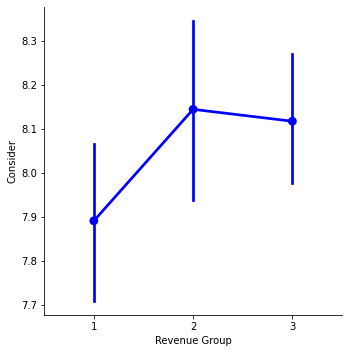

In [ ]:
h = sns.PairGrid(data=datacleanup, x_vars=['Revenue Group'], y_vars='Consider', size=5)
h.map(sns.pointplot, color="Blue")

Interesting to note that individuals that make between 100,000 to 250,000 appear to be more likely to consider / continue to use 

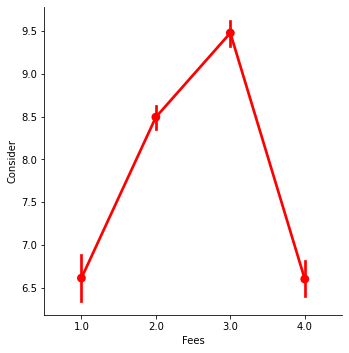

In [ ]:
h = sns.PairGrid(data=datacleanup, x_vars=['Fees'], y_vars='Consider', size=5)
h.map(sns.pointplot, color="Red")

In line with expectations, the more reasonable the fees, the higher the "Consider" rating.

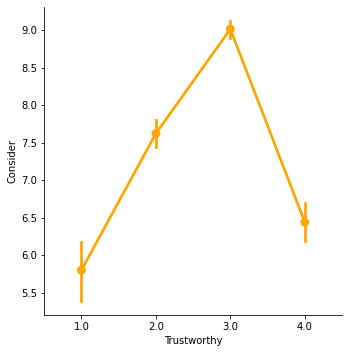

In [ ]:
h = sns.PairGrid(data=datacleanup, x_vars=['Trustworthy'], y_vars='Consider', size=5)
h.map(sns.pointplot, color="Orange")

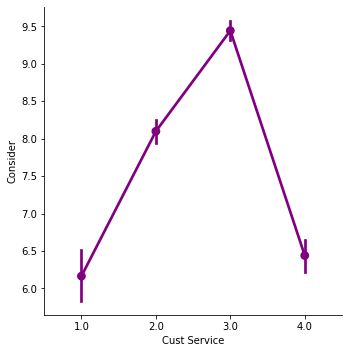

In [ ]:
h = sns.PairGrid(data=datacleanup, x_vars=['Cust Service'], y_vars='Consider', size=5)
h.map(sns.pointplot, color="Purple")

In line with expectations, the more reasonable the fees, trustworthiness, and better customer service, the higher the "Consider" rating.

#### Preliminary Modeling: 

#### Data Transformation for Modeling:

##### Transformation One: Min Max  

In [ ]:
trainmodel = datacleanup.copy()

In [ ]:
X,y=trainmodel.drop(['Consider'],axis=1),trainmodel['Consider']

In [ ]:
minmax = MinMaxScaler()
minmax.fit(X)

x_minmax = minmax.transform(X)
x_minmax = pd.DataFrame(x_minmax, columns = X.columns)
        

In [ ]:
X = x_minmax

In [ ]:
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

In [ ]:
def RegressorFit(model): 
    Regressor = model()
    Regressor.fit(train_X, train_y)
    Regressor.predict(val_X)
    return Regressor

##### Min Max Linear Regression# 

In [ ]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

10.61 percent


##### Min Max Decision Tree:

In [ ]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

-17.38  percent


##### Min Max Random Forest:

In [ ]:
forest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

34.16  percent


##### Min Max KNeighbors Regressor: 

In [ ]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

12.69  percent


##### Transformation Two: Standard Scaler 

In [ ]:
trainmodel = datacleanup.copy()

In [ ]:
X,y=trainmodel.drop(['Consider'],axis=1),trainmodel['Consider']

In [ ]:
StandardScaler = StandardScaler()
StandardScaler.fit(X)
x_StandardScaler = StandardScaler.transform(X)
x_StandardScaler_df = pd.DataFrame(x_StandardScaler, columns = X.columns)

In [ ]:
X = x_StandardScaler_df

In [ ]:
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

##### Standard Scaler Linear Regression: 

In [ ]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

7.78 percent


##### Standard Scaler Decision Tree: 

In [ ]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

-16.87  percent


##### Standard Scaler Random Forest:

In [ ]:
forest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

34.66  percent


##### Standard Sclaer KNeighbors Regressor: 

In [ ]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

13.41  percent


##### Transformation Three: Mean Centering 

In [ ]:
trainmodel = datacleanup.copy()

In [ ]:
X,y=trainmodel.drop(['Consider'],axis=1),trainmodel['Consider']

In [ ]:
scaled_data = scale(X)
x_scale = pd.DataFrame(scaled_data, columns = X.columns)

In [ ]:
X = x_scale

In [ ]:
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

##### Mean Centering Linear Regression: 

In [ ]:
linearregression = RegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(val_X, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

13.15 percent


##### Mean Centering Decision Tree: 

In [ ]:
decisiontree = RegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(val_X, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

-26.14  percent


##### Mean Centering Random Forest: 

In [ ]:
Meanforest = RegressorFit(RandomForestRegressor)

acc_random_forest = round(Meanforest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

37.59  percent


##### KNeighbors Regressor: 

In [ ]:
KNN = RegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(val_X, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

13.51  percent


As we can see, the models fit best with the mean centering transformation. As such, we will use this version of the data in the rest of thr analysis. With that said, the models are not fitting well - let's explore why:

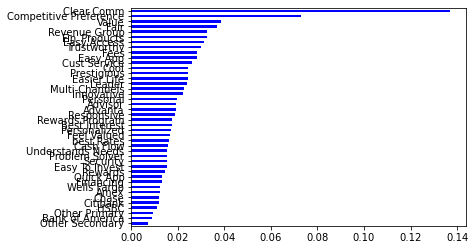

<Figure size 2160x2160 with 0 Axes>

In [ ]:
importances_rf = pd.Series(forest.feature_importances_,
index = X.columns)

sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='blue')
plt.figure(figsize=(30,30))
plt.show()

Interesting to see that clear communications is the most influential factor to the random forest model...

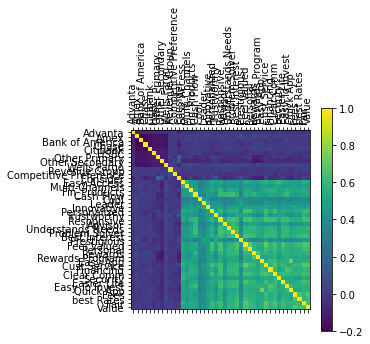

In [ ]:
plt.matshow(trainmodel.corr())
plt.xticks(range(len(trainmodel.columns)), trainmodel.columns, rotation='vertical')
plt.yticks(range(len(trainmodel.columns)), trainmodel.columns)
plt.colorbar()
plt.show()

As shown above we can see that the factors are all highly correlated.

### Primary Component Analyis ("PCA"):

In [ ]:
covar_matrix = PCA(n_components = len(trainmodel.columns)) #components are equal to the number of features we have
covar_matrix.fit(trainmodel)

covar_matrix = PCA(copy=True, iterated_power='auto', n_components=len(trainmodel.columns), random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrix.fit

<bound method PCA.fit of PCA(n_components=43)>

Exploring and validating:

In [ ]:
covar_matrixVal = PCA(copy=True, iterated_power='auto', n_components=len(trainmodel.columns), random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrixValfit = covar_matrixVal.fit(trainmodel)

In [ ]:
variance = covar_matrixVal.explained_variance_ratio_ #calculate variance ratios
variance

array([3.31801610e-01, 1.76537222e-01, 1.73159605e-01, 2.52225612e-02,
       2.34840141e-02, 1.73364106e-02, 1.60340755e-02, 1.53711035e-02,
       1.39937156e-02, 1.34481189e-02, 1.17351865e-02, 1.07422316e-02,
       1.03011417e-02, 9.84708231e-03, 9.20047899e-03, 8.77390506e-03,
       8.38939621e-03, 8.27575237e-03, 8.02887531e-03, 7.81585374e-03,
       7.53609170e-03, 7.29715912e-03, 7.16813059e-03, 6.89176704e-03,
       6.51532009e-03, 6.28815940e-03, 5.95101306e-03, 5.71067322e-03,
       5.47328226e-03, 5.38664597e-03, 5.10910615e-03, 4.70860150e-03,
       4.50676507e-03, 3.99335539e-03, 3.44406806e-03, 3.28585591e-03,
       2.83458419e-03, 2.33586788e-03, 1.96575490e-03, 1.81198039e-03,
       1.66283462e-03, 6.24642638e-04, 2.48757210e-32])

In [ ]:
var=np.cumsum(np.round(variance, decimals=5)*100)
var

array([ 33.18 ,  50.834,  68.15 ,  70.672,  73.02 ,  74.754,  76.357,
        77.894,  79.293,  80.638,  81.812,  82.886,  83.916,  84.901,
        85.821,  86.698,  87.537,  88.365,  89.168,  89.95 ,  90.704,
        91.434,  92.151,  92.84 ,  93.492,  94.121,  94.716,  95.287,
        95.834,  96.373,  96.884,  97.355,  97.806,  98.205,  98.549,
        98.878,  99.161,  99.395,  99.592,  99.773,  99.939, 100.001,
       100.001])

Next, as part of our validation process, we want to make sure that the components identified by PCA are unique populations. As such, we look at the top three features for each component:

In [ ]:
covar_matrixVal2 = PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrixValfit2 = covar_matrixVal2.fit(trainmodel)

In [ ]:
cols = trainmodel.columns
componentsclean = pd.DataFrame(covar_matrixVal2.components_ ,columns = cols)
componentsclean.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)


TopThree = pd.DataFrame(componentsclean.columns.values[np.argsort(-componentsclean.values, axis=1)[:, :3]], 
                  index=componentsclean.index,
                  columns = ['1st Max','2nd Max','3rd Max'])
TopThree

,1st Max,2nd Max,3rd Max
PC-1,Consider,Competitive Preference,Other Secondary
PC-2,Competitive Preference,Revenue Group,Rewards Program
PC-3,Rewards Program,Advisor,Quick App
PC-4,Advisor,Cash Flow,Problem Solver
PC-5,Cust Service,Easy Access,Clear Comm
PC-6,Quick App,Rewards Program,Easy App
PC-7,Rewards Program,Rewards,Feel Valued
PC-8,Revenue Group,Rewards Program,Rewards
PC-9,Rewards Program,Advisor,Leader
PC-10,Fees,best Rates,Leader


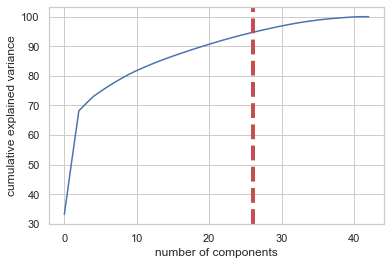

None

,Cumulative Variance Ratio,Explained Variance Ratio,Difference
0,0.331802,3.318016e-01,NaN
1,0.508339,1.765372e-01,0.176537
2,0.681498,1.731596e-01,0.173160
3,0.706721,2.522256e-02,0.025223
4,0.730205,2.348401e-02,0.023484
5,0.747541,1.733641e-02,0.017336
6,0.763575,1.603408e-02,0.016034
7,0.778947,1.537110e-02,0.015371
8,0.792940,1.399372e-02,0.013994
9,0.806388,1.344812e-02,0.013448


In [ ]:
sns.set(style='whitegrid')
plt.plot(var)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.axvline(linewidth=4, color='r', linestyle = '--', x=26, ymin=0, ymax=1)

display(plt.show())
evr = covar_matrixVal.explained_variance_ratio_
cvr = np.cumsum(covar_matrixVal.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df['Difference'] = pca_df['Cumulative Variance Ratio'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
display(pca_df.head(43))

Based on the above we can see that after 26 components we are able to explain 95% of the information and the incremental amount of information explained by each component significantly decreases.

In [ ]:
pca = PCA(n_components=26)
pca.fit(train_X)
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(val_X)

Looking at loadings:

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(covar_matrixVal.components_, columns=cols, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
Advanta,0.000427,0.002883,0.003760,-0.004095,-0.005090,-0.005873,0.005150,0.001768,0.006249,0.002844
Amex,-0.003341,0.000071,-0.000918,-0.015610,-0.011223,-0.002325,0.014669,0.005021,0.042039,-0.028996
Bank of America,-0.000953,0.002074,0.002267,0.009651,-0.005530,0.001248,-0.008394,-0.009709,0.012664,0.003355
Chase,-0.000455,0.006850,0.011511,0.003860,-0.001987,0.020193,0.015886,0.015399,-0.002078,-0.002492
Citibank,-0.001832,-0.000012,0.004220,-0.004180,-0.001160,0.016064,0.009350,0.012581,-0.007295,0.006528
HSBC,0.001149,0.003325,0.003780,0.003787,-0.010966,0.015932,0.003657,0.006562,-0.014048,-0.001540
Other Primary,0.003017,-0.014062,-0.015929,0.005517,0.020826,-0.029861,-0.017078,-0.016751,-0.020748,-0.005834
Other Secondary,0.006411,-0.003916,-0.013545,-0.002113,0.012517,-0.013933,-0.012058,-0.017906,-0.025679,0.009267
Wells Fargo,-0.004426,0.002786,0.004853,0.003184,0.002612,-0.001447,-0.011182,0.003035,0.008896,0.016869
Revenue Group,-0.000951,0.018856,-0.022110,0.027164,-0.063675,-0.374255,-0.293512,0.823721,-0.019507,-0.210564


In [ ]:
PCAtrainmodel = trainmodel.copy()
X,y=PCAtrainmodel.drop(['Consider'],axis=1),PCAtrainmodel['Consider']
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=(.8))

In [ ]:
train_y = np.array(train_y)

In [ ]:
pca = PCA(n_components = 26)
pca.fit(train_X,train_y)

X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(val_X)

In [ ]:
def PCARegressorFit(model): 
    Regressor = model()
    Regressor.fit(X_train_pca, train_y)
    Regressor.predict(X_test_pca)
    return Regressor

##### Linear Regression: 

In [ ]:
linearregression = PCARegressorFit(LinearRegression)

acc_lin_reg = round( linearregression.score(X_test_pca, val_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

9.92 percent


##### Decision Tree: 

In [ ]:
decisiontree = PCARegressorFit(DecisionTreeRegressor)

acc_decision_tree = round(decisiontree.score(X_test_pca, val_y) * 100, 2)
print(round(acc_decision_tree,2,), ' percent')

-44.3  percent


##### Random Forest:  

In [ ]:
forest = PCARegressorFit(RandomForestRegressor)

acc_random_forest = round(forest.score(X_test_pca, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

25.87  percent


##### KNeighbors Regressor:

In [ ]:
KNN = PCARegressorFit(KNeighborsRegressor)

acc_KNN = round(KNN.score(X_test_pca, val_y) * 100, 2)
print(round(acc_KNN,2,), ' percent')

16.75  percent


#### Selecting Hyperparameters Via Randomized Search CV:

In [ ]:
forest_2 = RandomForestRegressor()

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(forest_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

rs.fit(X_train_pca, train_y)
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

Looking at parameters by rank:

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,12,2,sqrt,13,False,0.273245,1
1,600,23,2,sqrt,15,False,0.272383,2
2,400,23,2,sqrt,14,False,0.271782,3
3,700,23,7,log2,15,False,0.257589,4
4,700,2,2,log2,11,True,0.257149,5
5,1000,12,7,sqrt,10,True,0.245363,6
6,300,28,7,log2,13,True,0.239917,7
7,500,12,18,sqrt,13,False,0.239726,8
8,100,2,18,sqrt,15,False,0.239397,9
9,800,28,12,sqrt,14,True,0.238682,10


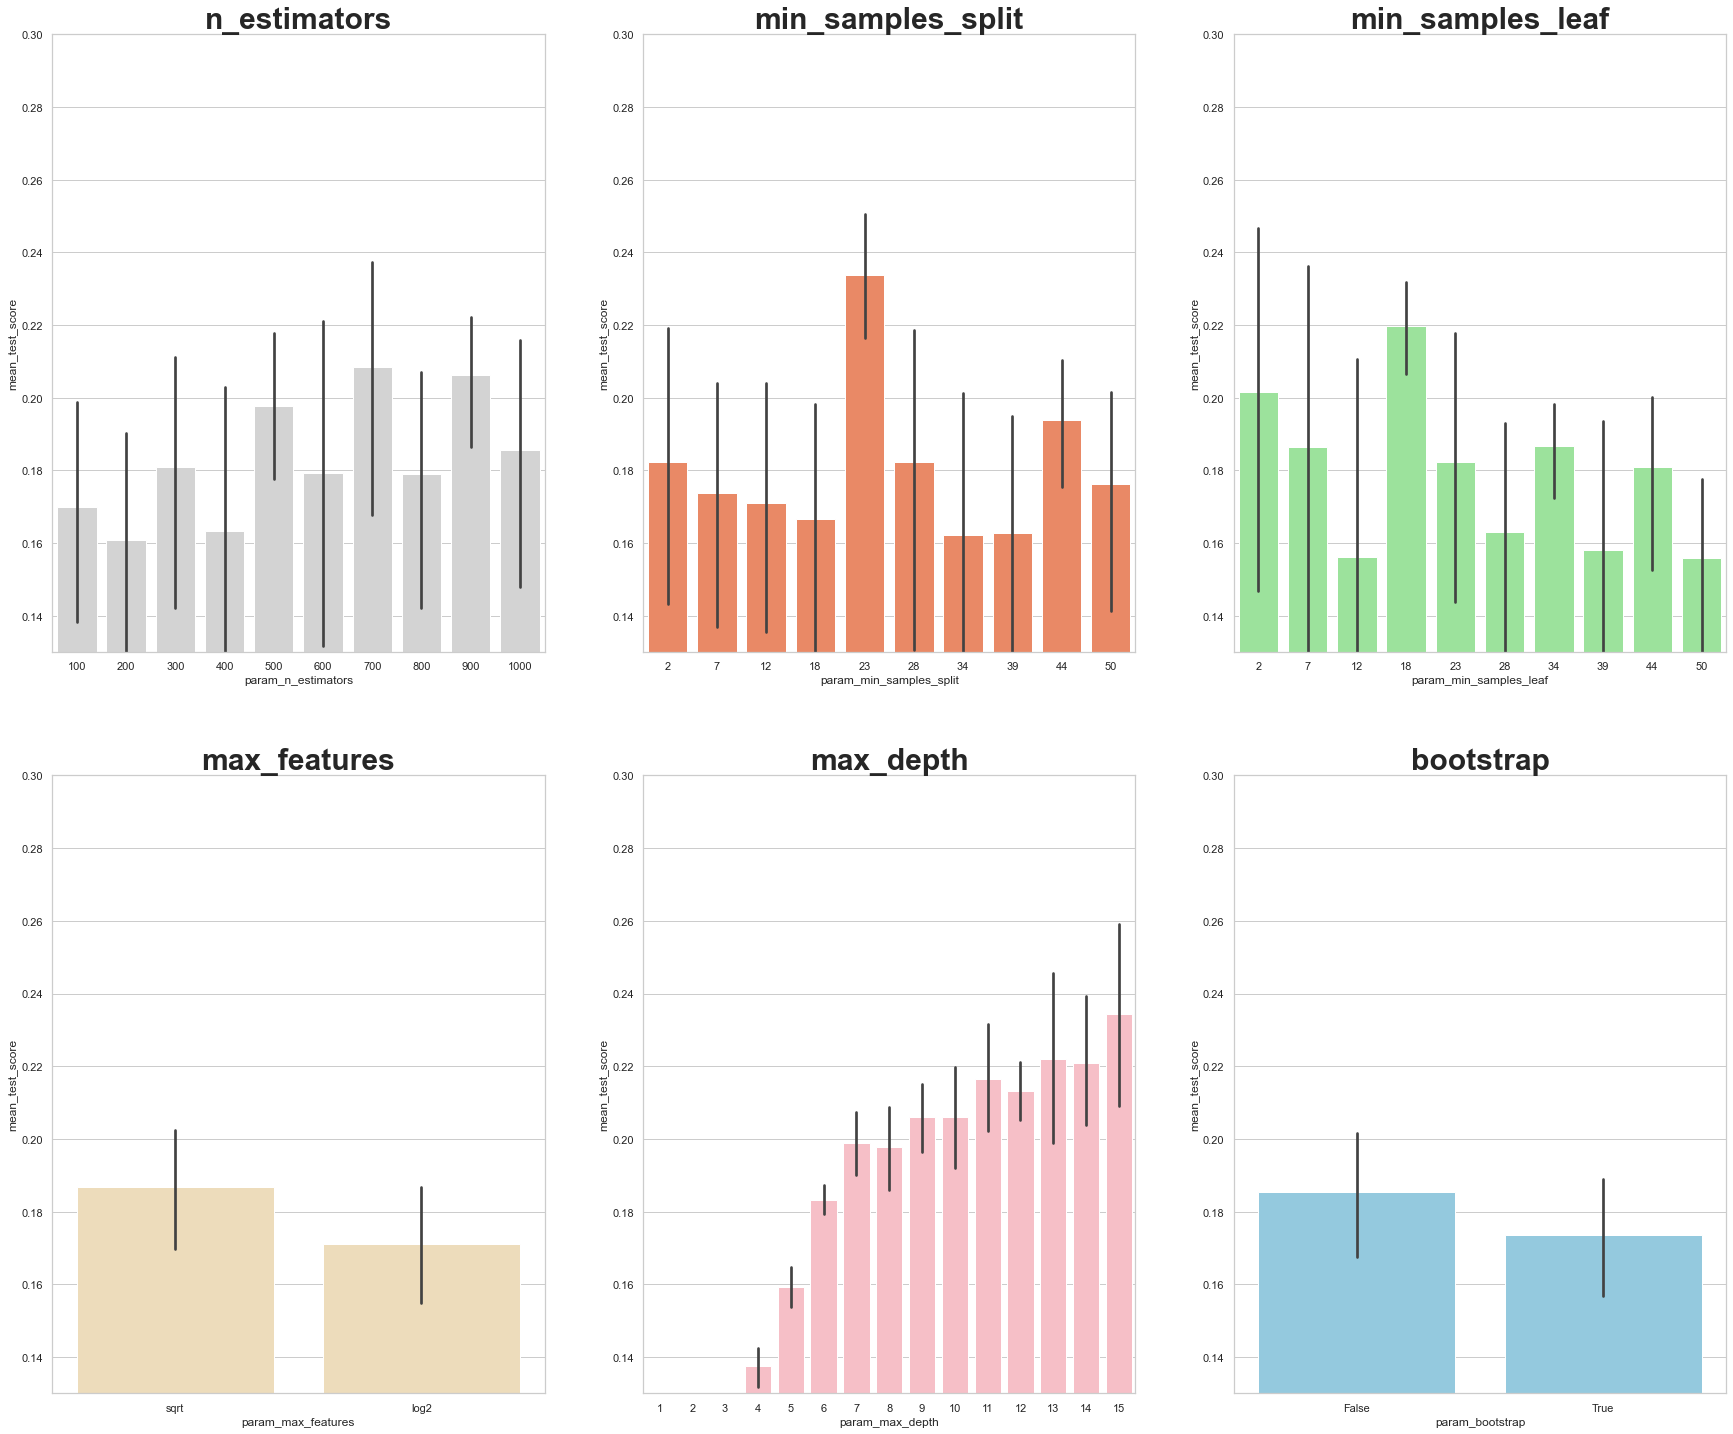

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)

sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.13,.3])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.13,.3])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.13,.3])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.13,.3])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.13,.3])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.13,.3])

axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

plt.show()

#### Selecting Hyperparameters Via Grid Search CV:

In [ ]:
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(forest_2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_pca, train_y)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 700}

In [ ]:
rf3 = gs.best_estimator_.fit(X_train_pca, train_y)

# Predict the test set labels 'y_pred'
y_pred = gs.best_estimator_.predict(X_test_pca)
y_pred_train=gs.best_estimator_.predict(X_train_pca)
# Evaluate the test set RMSE
rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print('Train set RMSE: {:.2f}'.format(rmse_train))

MSE_CV_scores = - cross_val_score(rf3, train_X, train_y, cv=3, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('CV RMSE is: {:.2f}'.format(RMSE_CV))
acc_random_forest2 = round(rf3.score(X_test_pca, val_y) * 100, 2)
print(round(acc_random_forest2,2,), ' percent')

Test set RMSE: 2.49
Train set RMSE: 1.08
CV RMSE is: 2.30
26.16  percent


In [ ]:
rf3 = RandomForestRegressor(n_estimators=700,
n_jobs=-1)

rf3.fit(X_train_pca, train_y)

# Predict the test set labels 'y_pred'
y_pred = gs.best_estimator_.predict(X_test_pca)
y_pred_train=gs.best_estimator_.predict(X_train_pca)
# Evaluate the test set RMSE
rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print('Train set RMSE: {:.2f}'.format(rmse_train))

MSE_CV_scores = - cross_val_score(rf3, train_X, train_y, cv=3, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('CV RMSE is: {:.2f}'.format(RMSE_CV))
acc_random_forest2 = round(rf3.score(X_test_pca, val_y) * 100, 2)
print(round(acc_random_forest2,2,), ' percent')

Test set RMSE: 2.49
Train set RMSE: 1.08
CV RMSE is: 2.31
27.39  percent


##### Ensemble: 

In [ ]:
gb = GradientBoostingRegressor()

gb.fit(X_train_pca, train_y)

y_pred_Gboost = gb.predict(X_test_pca)

y_pred_train=gb.predict(X_train_pca)

rmse_test = MSE(val_y, y_pred_Gboost)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

acc_GradientBoostingRegressor = round(gb.score(X_test_pca, val_y) * 100, 2)
print(round(acc_GradientBoostingRegressor,2,), ' percent')

Test set RMSE of gb: 2.51
Train set RMSE of gb: 2.03
24.99  percent


In [ ]:
lr = LinearRegression()

rf = RandomForestRegressor()

dt = DecisionTreeRegressor()

regressors = [('Linear Regression', lr), ('Decision Tree', dt),('Random Forest',rf)]

In [ ]:
for i, model in regressors:
    model.fit(X_train_pca, train_y)
    y_pred = model.predict(X_test_pca)
    print(f"{i}:{MSE(val_y, y_pred)**(1/2)}")

Linear Regression:2.749397752724853
Decision Tree:3.380852110685657
Random Forest:2.4735884871437825


In [ ]:
vc = VotingRegressor(estimators=regressors)     

vc.fit(X_train_pca, train_y)   

y_pred = vc.predict(X_test_pca)

y_pred_train=vc.predict(X_train_pca)

rmse_test = MSE(val_y, y_pred)**(1/2)
rmse_train = MSE(train_y, y_pred_train)**(1/2)


print('Test set RMSE of VC: {:.2f}'.format(rmse_test))
print('Train set RMSE of VC: {:.2f}'.format(rmse_train))

acc_VotingRegressor = round(vc.score(X_test_pca, val_y) * 100, 2)
print('Voting Regressor:',round(acc_VotingRegressor,2,), ' percent')

Test set RMSE of VC: 2.56
Train set RMSE of VC: 1.22
Voting Regressor: 21.73  percent


### Best Model: 

In [ ]:
acc_random_forest = round(Meanforest.score(val_X, val_y) * 100, 2)
print(round(acc_random_forest,2,), ' percent')

37.59  percent


In [ ]:
y_pred = forest.predict(val_X)

predictions_df = pd.DataFrame(y_pred, columns = ["yhat"])
predictions_df["y"] = val_y.values
predictions_df

,yhat,y
0,5.19,6.0
1,3.35,9.0
2,6.33,8.0
3,8.05,10.0
4,7.66,10.0
...,...,...
661,5.56,10.0
662,4.78,10.0
663,4.85,1.0
664,5.00,6.0


We began this analysis by first loading and understanding both the data and metadata provided in the brand strategy file. From our understanding, the goal of this assignment is to understand and predict the likelihood of a customer to use / continue to use each brand's products (as measured by "consider"). As such, we re-oriented the data to better predict this. To do this we dropped columns that do not pertain to the target brands or any of their attributes. Then, based on the metadata descriptions, we assigned more comprehensive column labels to make data handling easier throughout the analysis.


As shown, approximately 23% of the rows contain null values for the vast majority of the brand attributes. While our first instinct was to potentially cluster the data and then impute the values based on the mean values for each attribute, after thinking through the context of the dataset we chose not to. When looking at the rows that contain missing values, we can see that the respondent only completed the first four questions and skipped the rest of the survey. This could be due to survey fatigue, false motives for taking the survey or lack of brand knowledge. Based thereon, we made the decision to delete any rows missing five or more questions as imputing the values would significantly skew the data and render our analysis nonmeaningful. Further, we removed any rows missing the target variable, “Consider”, as our model would not have been able to learn from such records. 


After handling the null values, we moved to properly attribute each survey response to a brand in a more appropriate manner for our model. Originally, the “Brand_id” column was filled with values from one to nine, each corresponding to a brand. However, in a regression model, the model would interpret this as there being a linear relationship between brands which is not correct. As such, we created a dummy variable for each brand and dropped the “Brand_id” column.


Once our data set was substantially clean, we fitted preliminary models on the data after using standard scaler, min max, and mean centering normalization methods to handle the skewness of the survey responses. As shown, random forest regressor on mean centered data performed the highest.


After fitting the models, we explored the most important features and the correlation of the attributes. As shown in the heatmap, we can see that there is an extreme amount of redundancy among the attributes. As such, we move to incorporate PCA into our analysis in order to account for this collinearity using 26 components which accounts for approximately 95% of the variance. 


As shown, our base PCA models do not have higher accuracy scores, as measured by r-squared, compared to our preliminary models. In order to improve our models, we used random search cv, grid search cv, and ensemble methods, including gradient boosting regressor and voting regressor. However, as shown, hyperparameters and ensemble methods fail to improve our model.


Based thereon, our best model, as measured by r-squared, is the mean centered random forest regression model with an accuracy of approximately 38%. While we would ideally like to be able to report an accuracy score above 80%, our methodology failed to produce such a model. In reflection, we believe that this is due to the original survey response data. While we aimed to transform the data to account for any collinearity and skewness, the original questions in the survey were ultimately not unique enough to allow us to explain enough information to accurately deduce the relationships between the brand attributes and our target variable. As Anil has covered in class, each survey question needs to be unique and worth its weight in gold. As exemplified in our analysis, poor survey questions that do not extract unique information / dimensions of a consumer’s relationship with a brand are meaningless and ultimately not actionable for a data science team. 
